In [1]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [2]:
import os
import numpy as np
import random

# For the plots
import matplotlib.pyplot as plt

In [3]:
from DatasetLoader_mine import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'GuangzhouTraffic/traffic_speed_hourly.csv')

dl = DatasetLoader('GuangzhouTraffic', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  GuangzhouTraffic
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  GuangzhouTraffic
Dataset contains missing values?  False
--------------------------
(206, 1464)


In [4]:
sample_len = (matrix_1_norm.shape[0]*matrix_1_norm.shape[1]*15)/(314*365)
print("Sample_len total", sample_len)

np.random.seed(3)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 39.47090131751156
[ 819 1388  243  592  725  616  424  131  805  472 1079  747  492  976
  600  843 1373  841  324 1398 1012  103  744  464  293  381 1269  783
  766  121  708] [1008  350  355 1094 1416 1346 1265  799]


### Model HD

In [5]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

 10%|█         | 1/10 [00:10<01:34, 10.50s/it]

Training mean squared error of 0.014


 20%|██        | 2/10 [00:21<01:27, 10.98s/it]

Training mean squared error of 0.009


 30%|███       | 3/10 [00:33<01:19, 11.32s/it]

Training mean squared error of 0.008


 40%|████      | 4/10 [00:47<01:14, 12.33s/it]

Training mean squared error of 0.007


 50%|█████     | 5/10 [00:58<00:58, 11.73s/it]

Training mean squared error of 0.006


 60%|██████    | 6/10 [01:08<00:45, 11.30s/it]

Training mean squared error of 0.006


 70%|███████   | 7/10 [01:18<00:32, 10.96s/it]

Training mean squared error of 0.005


 80%|████████  | 8/10 [01:29<00:21, 10.75s/it]

Training mean squared error of 0.005


 90%|█████████ | 9/10 [01:39<00:10, 10.71s/it]

Training mean squared error of 0.004


100%|██████████| 10/10 [01:50<00:00, 11.00s/it]


Training mean squared error of 0.004


100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

Testing mean squared error of testing 0.024


### Model DNN

In [6]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=False, dataset=3)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 40)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 40, 1)        0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 40, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 40, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

31it [00:00, 4420.16it/s]


Epoch 1/10
50/50 [==============================] - 35s 50ms/step - loss: 0.1562
Epoch 2/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0174
Epoch 3/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0121
Epoch 4/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0102
Epoch 5/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0091
Epoch 6/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0086
Epoch 7/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0085
Epoch 8/10
50/50 [==============================] - 1s 28ms/step - loss: 0.0080
Epoch 9/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0079
Epoch 10/10
50/50 [==============================] - 1s 29ms/step - loss: 0.0074


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▎        | 1/8 [00:14<01:41, 14.55s/it]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2/8 [00:25<01:14, 12.40s/it]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 3/8 [00:35<00:57, 11.47s/it]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 4/8 [00:46<00:44, 11.12s/it]

1/1 [==============================] - 0s 19ms/step


 62%|██████▎   | 5/8 [00:56<00:32, 10.79s/it]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 6/8 [01:06<00:21, 10.61s/it]

1/1 [==============================] - 0s 18ms/step


 88%|████████▊ | 7/8 [01:17<00:10, 10.50s/it]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 8/8 [01:27<00:00, 10.96s/it]

Testing mean squared error of 0.039


### Model VAE

In [7]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_original, sets_training, retraining=False, dataset = 3)
model_vae, dif_vae = Test_VAE(vae, matrix_1_original, sets_testing)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


206
1464
206
1464
(6386, 41, 1) (6386, 41, 1)
(6386, 41, 1) (6386, 41, 1)
Epoch 1/10
200/200 [==============================] - 9s 12ms/step - loss: 29.6228
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 25.8697
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 25.4005
Epoch 4/10
200/200 [==============================] - 3s 14ms/step - loss: 20.8799
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 17.7532
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 16.8815
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 16.9791
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 16.0887
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 15.0725
Epoch 10/10
200/200 [==============================] - 2s 11ms/step - loss: 14.8833
206
1464
206
1464
(1648, 41, 1) (1648, 41, 1)
(1648, 41, 1) (1648, 41, 1)
52/52 [==============

[0.17901489, 5.501077235076806, 0.10943367805121057]
[0.084679164, 4.717038863232688, 0.10829842187497783]


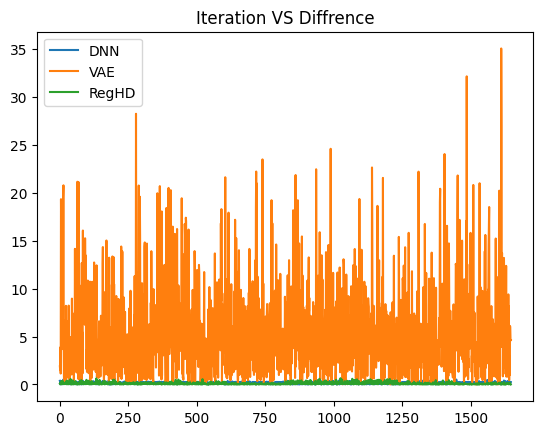

In [8]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

#for i in range(len(vae)):
 #   if vae[i] > 0.7:
  #      vae[i] = 0.7


plt.title("Iteration VS Diffrence")
plt.plot(y, dnn, "-")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.legend(["DNN", 'VAE', "RegHD"])
#plt.xlim(0,200)
plt.show()